<p style="text-align:center">
    <a href="https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023" target="_blank">
    <img src="dataset-cover.png" width="200" alt="Forbes"  />
    </a>
</p>

# Global Food Prices


## Notebook
Investigating the global food crisis

### Objectives

In this lab:

-   Acquire data from kaggle
-   Obtain insights from data with Pandas library

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#data_introduction">Introduction</a>
    <li><a href="#data_acquisition">Data Acquisition</a>
    <li><a href="#basic_insight">Basic Insight of Dataset</a></li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns Using Visualization</a></li>
</ol>


</div>
<hr>


<h1 id="data_introduction">Introduction</h1>

<p>In 2022, the world may face a global food crisis. This dataset includes information on food prices, meat prices, dairy prices, cereal prices, oil prices, and sugar prices. This data is of utmost importance to researchers as it will help inform their work on finding solutions to this potential crisis. With this data, we can better understand the factors that may contribute to the crisis and work towards finding solutions that could help prevent or mitigate its effects.<br>
    
<ul>
    <li>Data source: <a href="https://www.kaggle.com/datasets/thedevastator/food-prices-year-by-year" target="_blank">https://www.kaggle.com/datasets/thedevastator/food-prices-year-by-year</a></li>
    <li>Data type: csv</li>
</ul>

</p>


<h1 id="data_acquisition">Data Acquisition</h1>

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import opendatasets as od
%matplotlib inline

In [3]:
od.download("https://www.kaggle.com/datasets/thedevastator/food-prices-year-by-year")

Skipping, found downloaded files in ".\food-prices-year-by-year" (use force=True to force download)


In [4]:
df_raw = pd.read_csv("food-prices-year-by-year/FAOFP1990_2022.csv", encoding="ISO-8859-1")

In [5]:
df_raw.head()

,Date,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
0,01/01/1990,64.1,73.4,53.5,64.1,44.59,87.9
1,01/02/1990,64.5,76.0,52.2,62.2,44.50,90.7
2,01/03/1990,63.8,77.8,41.4,61.3,45.75,95.1
3,01/04/1990,65.8,80.4,48.4,62.8,44.02,94.3
4,01/05/1990,64.4,81.0,39.2,62.0,45.50,90.4


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              390 non-null    object 
 1   Food.Price.Index  390 non-null    float64
 2   Meat              390 non-null    float64
 3   Dairy             390 non-null    float64
 4   Cereals           390 non-null    float64
 5   Oils              390 non-null    float64
 6   Sugar             390 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.5+ KB


In [7]:
df_raw['year'] = pd.DatetimeIndex(df_raw['Date']).year

In [8]:
df_raw.head(10)

,Date,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar,year
0,01/01/1990,64.1,73.4,53.5,64.1,44.59,87.9,1990
1,01/02/1990,64.5,76.0,52.2,62.2,44.50,90.7,1990
2,01/03/1990,63.8,77.8,41.4,61.3,45.75,95.1,1990
3,01/04/1990,65.8,80.4,48.4,62.8,44.02,94.3,1990
4,01/05/1990,64.4,81.0,39.2,62.0,45.50,90.4,1990
5,01/06/1990,63.7,83.1,39.2,60.7,43.80,80.3,1990
6,01/07/1990,62.5,83.4,39.2,57.9,43.72,74.2,1990
7,01/08/1990,61.5,83.7,36.8,55.7,45.37,67.6,1990
8,01/09/1990,61.0,84.5,38.1,52.5,44.79,68.5,1990
9,01/10/1990,61.1,85.4,38.9,52.8,45.72,60.8,1990


In [9]:
df_raw.drop(['Date'], axis=1, inplace=True)

In [10]:
df_raw.isna().sum()

Food.Price.Index    0
Meat                0
Dairy               0
Cereals             0
Oils                0
Sugar               0
year                0
dtype: int64

In [11]:
food_year = df_raw.groupby(['year'],as_index=True).mean()

In [12]:
food_year.head()

,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
year,,,,,,
1990,63.016667,81.550000,42.616667,58.083333,45.471667,77.700000
1991,62.058333,80.633333,45.466667,57.866667,49.007500,55.483333
1992,63.925000,77.516667,54.800000,60.958333,52.993333,56.025000
1993,61.933333,74.066667,48.608333,59.025000,53.965833,62.025000
1994,66.933333,75.333333,47.408333,61.933333,71.867500,74.950000


In [13]:
food_year.shape

(33, 6)

In [14]:
last10years = food_year.sort_values(['year'], ascending=False, axis=0).head(10)
last10years.drop(columns='Food.Price.Index',inplace=True)
last10years.head(10)


,Meat,Dairy,Cereals,Oils,Sugar
year,,,,,
2022,120.412500,143.875000,157.250000,206.250000,115.437500
2021,106.920000,117.440000,129.180000,161.522000,107.550000
2020,95.533333,101.833333,103.108333,99.442500,79.508333
2019,99.991667,102.808333,96.600000,83.238333,78.608333
2018,94.891667,107.275000,100.816667,87.760833,77.400000
2017,97.741667,108.016667,90.983333,101.908333,99.100000
2016,91.025000,82.650000,88.316667,99.443333,111.616667
2015,96.733333,87.141667,95.875000,89.941667,83.183333
2014,112.250000,130.200000,115.825000,110.615833,105.200000


In [15]:
last10years.index = last10years.index.map(int)

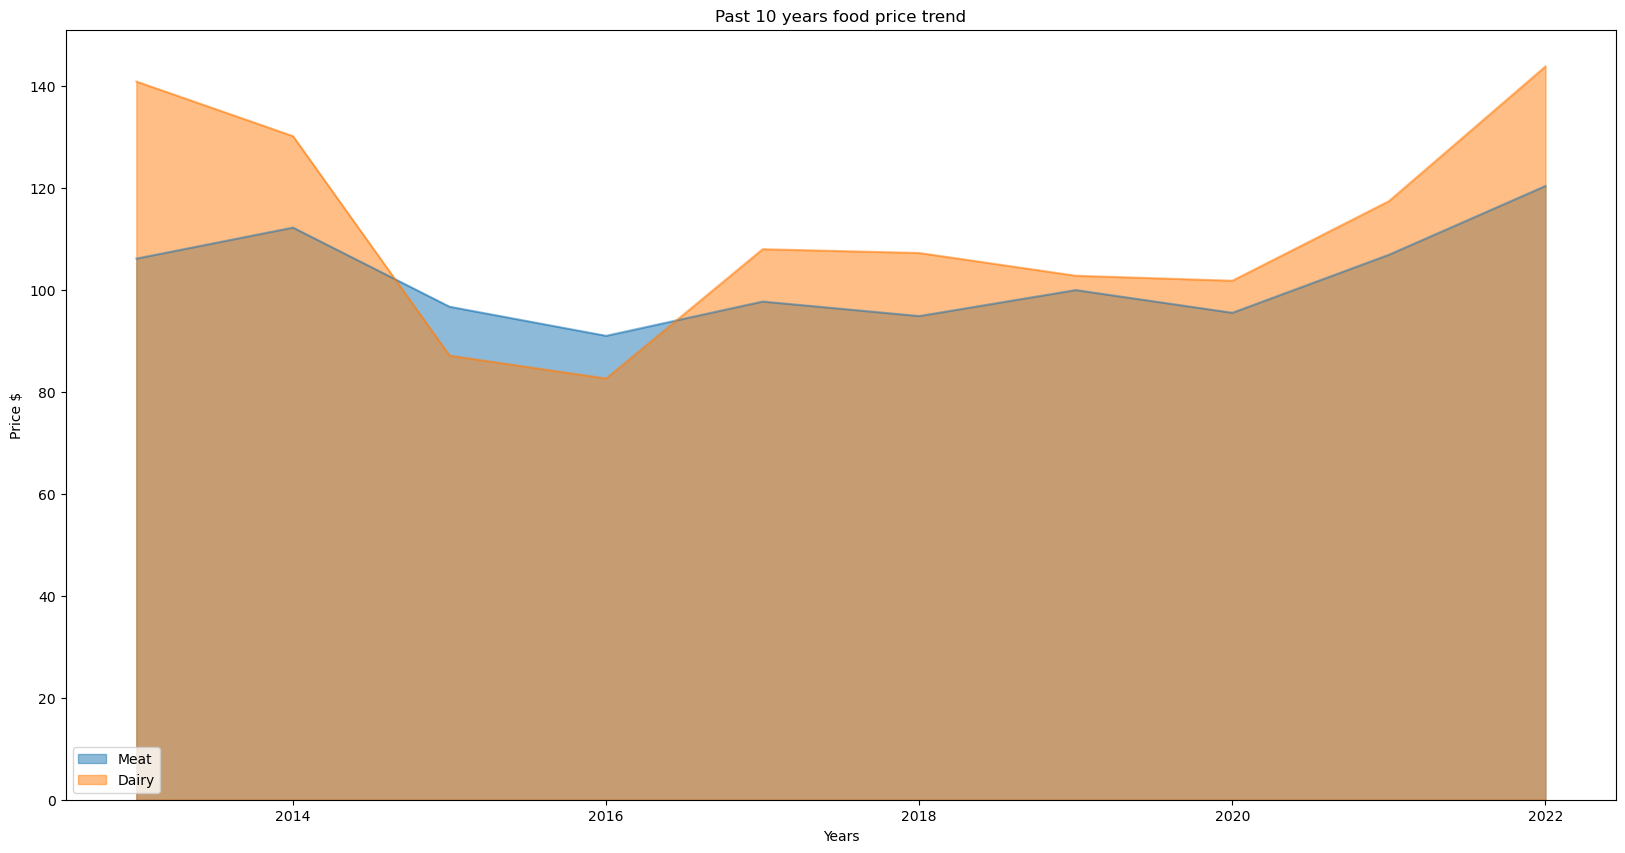

In [16]:
last10years[['Meat','Dairy']].plot(kind='area', stacked=False, figsize=(20,10))
plt.title('Past 10 years food price trend')
plt.xlabel('Years')
plt.ylabel('Price $')
plt.show()

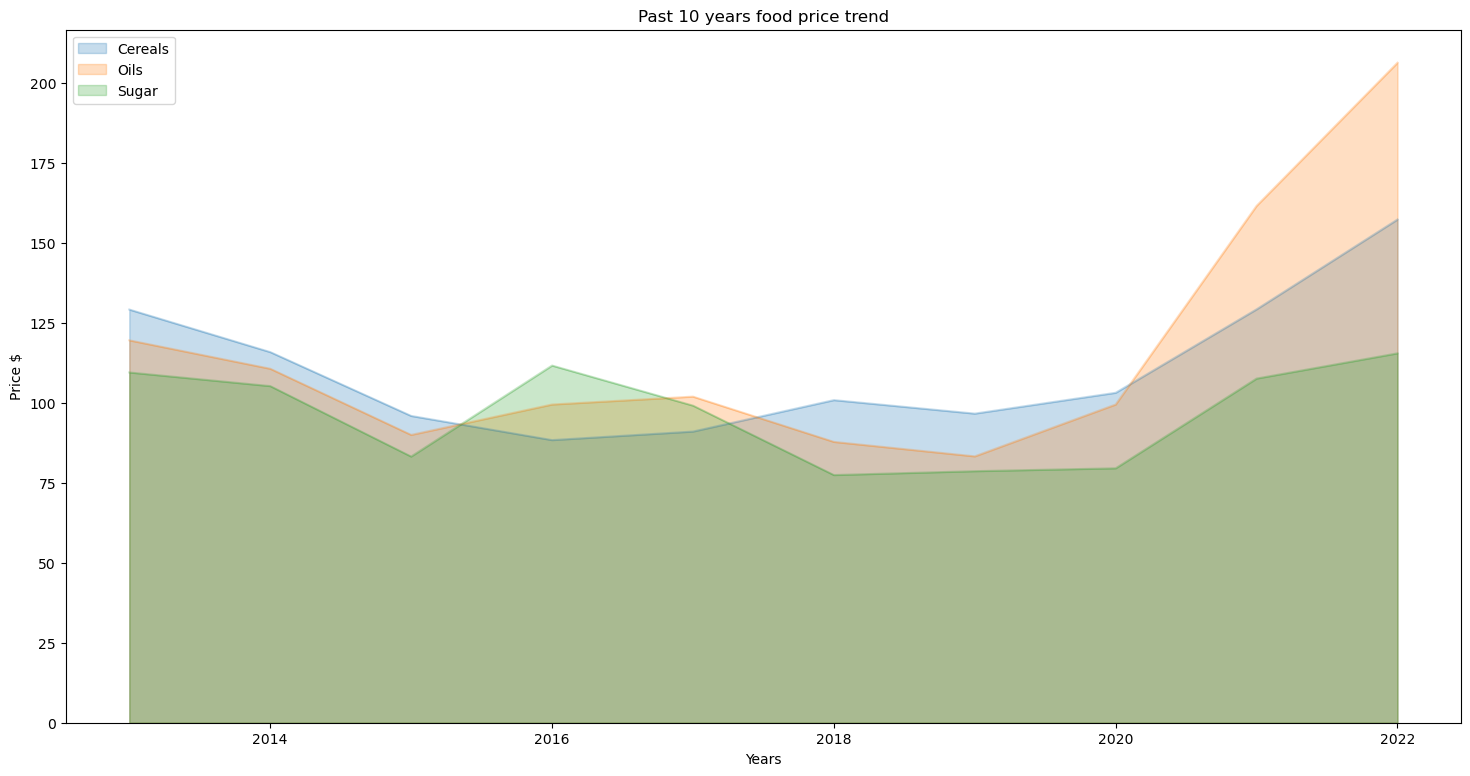

In [17]:
last10years[['Cereals', 'Oils','Sugar']].plot(kind='area', alpha=0.25, stacked=False, figsize=(18,9))

plt.title('Past 10 years food price trend')
plt.xlabel('Years')
plt.ylabel('Price $')
plt.show()

Text(0, 0.5, 'Price $')

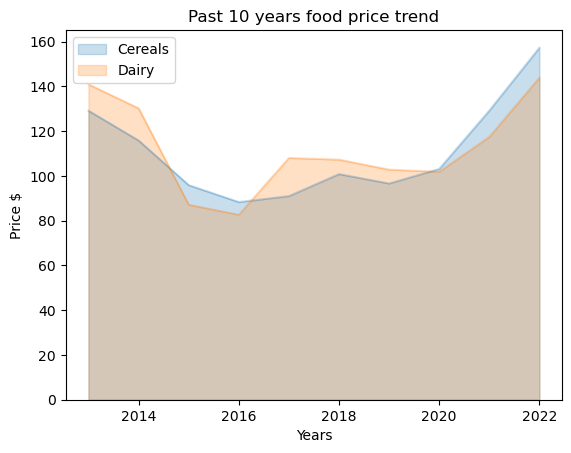

In [18]:
axes = last10years[['Cereals','Dairy']].plot(kind='area', alpha=0.24, stacked=False)
axes.set_title('Past 10 years food price trend')
axes.set_xlabel('Years')
axes.set_ylabel('Price $')

In [19]:
foodt = food_year.transpose()

In [20]:
foodt.columns = foodt.columns.astype(str)
foodt.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object', name='year')

In [21]:
foodt[['2012']].head()

year,2012
Food.Price.Index,122.841667
Meat,104.966667
Dairy,111.650000
Cereals,137.400000
Oils,138.307500


Text(0, 0.5, 'Avg. Price of whole Year')

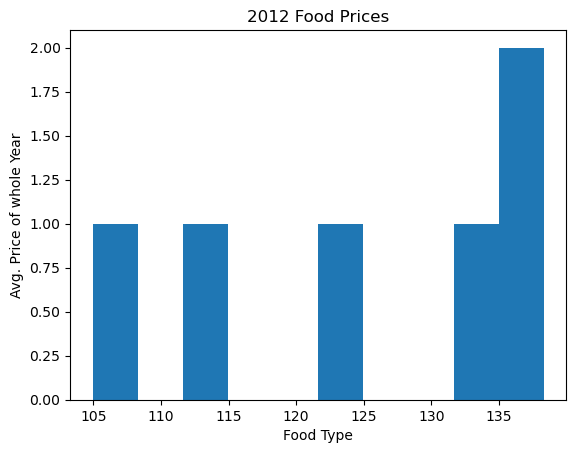

In [22]:
axhist = foodt['2012'].plot(kind='hist')
axhist.set_title('2012 Food Prices')
axhist.set_xlabel('Food Type')
axhist.set_ylabel('Avg. Price of whole Year')

<Axes: ylabel='Frequency'>

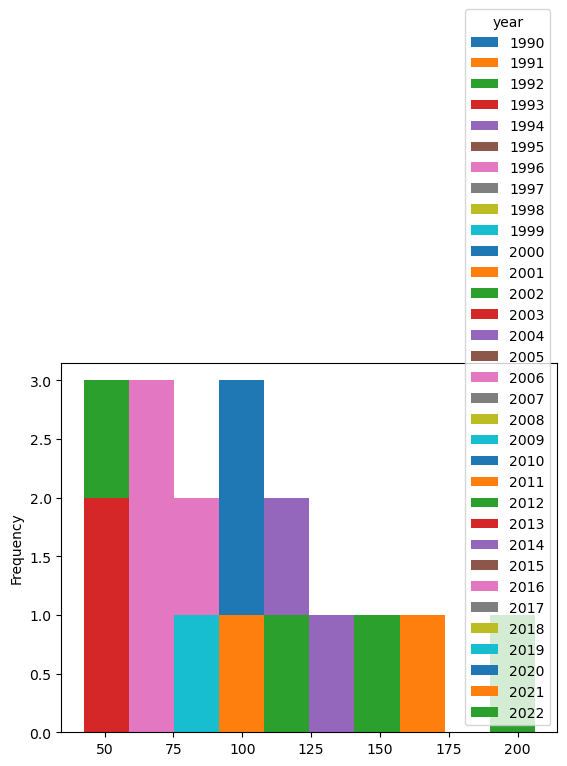

In [23]:
foodt.loc[['Meat','Dairy','Oils'],:].plot.hist()

In [24]:
food_year.describe()

,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,85.811010,84.258056,84.379747,87.119596,89.784303,81.246086
std,26.255719,17.068170,32.470733,31.095297,38.515284,29.718266
min,53.116667,55.166667,42.616667,51.400000,42.482500,38.800000
25%,63.925000,71.758333,54.800000,59.383333,62.630000,56.025000
50%,77.650000,81.550000,77.208333,83.650000,83.238333,77.700000
75%,98.125000,96.733333,111.650000,103.108333,107.315000,105.200000
max,148.300000,120.412500,143.875000,157.250000,206.250000,160.900000


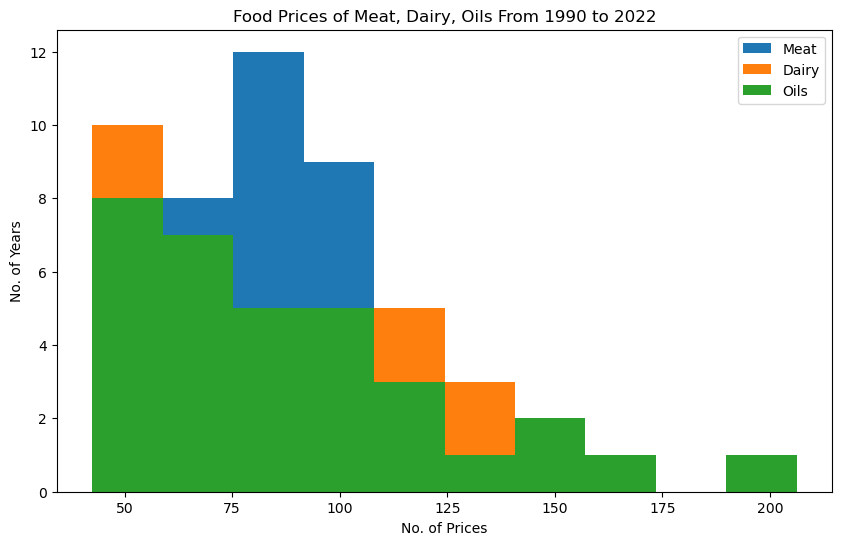

In [25]:
food_year[['Meat','Dairy','Oils']].plot(kind='hist',figsize=(10,6))
plt.title('Food Prices of Meat, Dairy, Oils From 1990 to 2022')
plt.xlabel('No. of Prices')
plt.ylabel('No. of Years')
plt.show()

In [27]:
fSugar = food_year['Sugar']
fSugar.head()

year
1990    77.700000
1991    55.483333
1992    56.025000
1993    62.025000
1994    74.950000
Name: Sugar, dtype: float64

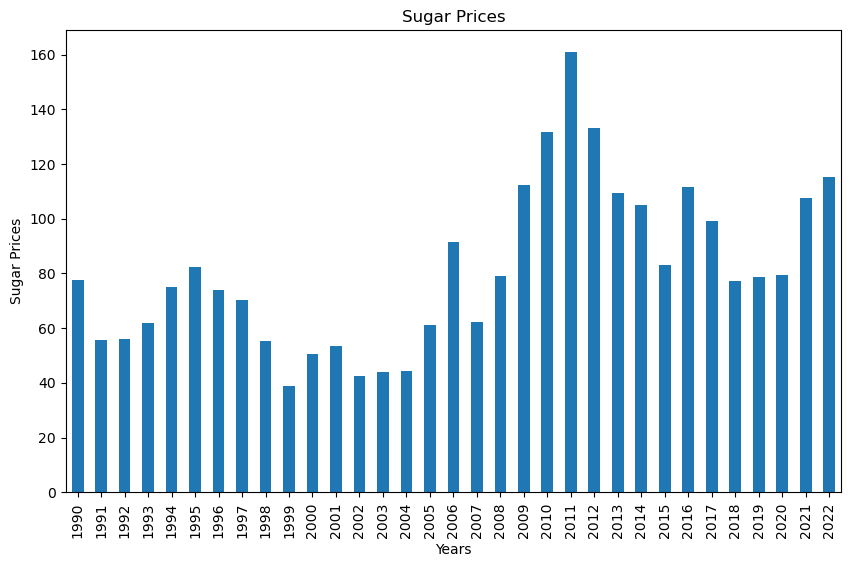

In [30]:
fSugar.plot(kind='bar', figsize=(10,6))
plt.title('Sugar Prices')
plt.xlabel('Years')
plt.ylabel('Sugar Prices')
plt.show()

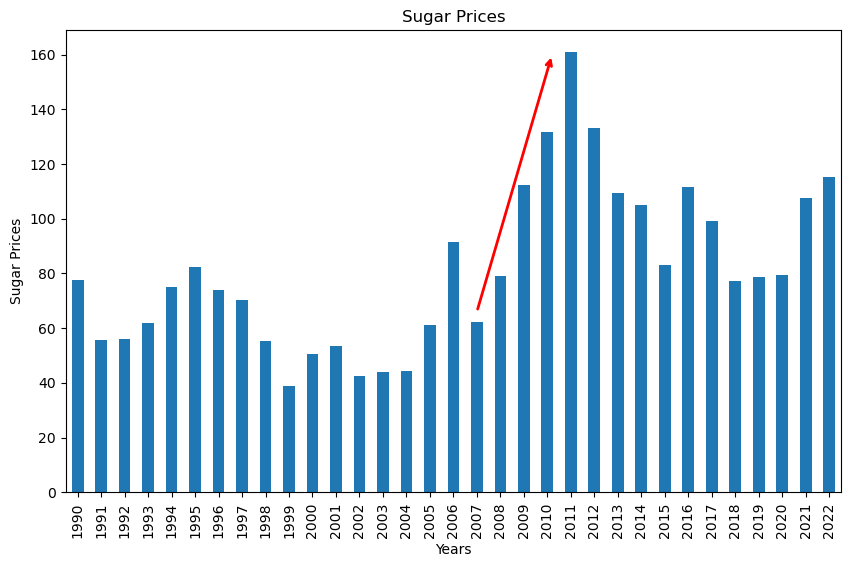

In [42]:
fSugar.plot(kind='bar', figsize=(10,6))
plt.title('Sugar Prices')
plt.xlabel('Years')
plt.ylabel('Sugar Prices')

plt.annotate('',
             xy=(20.2,160),
             xytext=(17,66),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red',lw=2)
            )

plt.show()

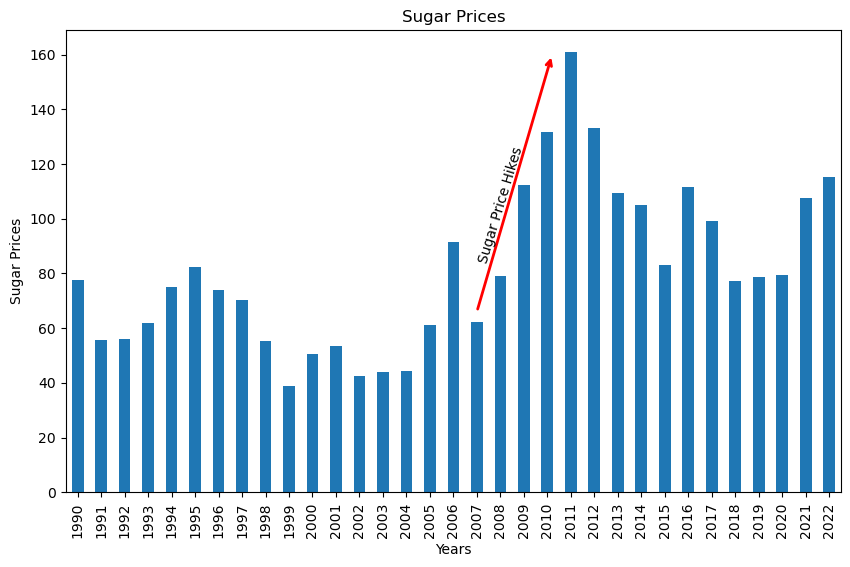

In [51]:
fSugar.plot(kind='bar', figsize=(10,6))
plt.title('Sugar Prices')
plt.xlabel('Years')
plt.ylabel('Sugar Prices')

plt.annotate('',
             xy=(20.2,160),
             xytext=(17,66),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red',lw=2)
            )
plt.annotate('Sugar Price Hikes',
             xy=(17, 83),
             rotation=73,
             va='bottom',
             ha='left',
            )
plt.show()